# Logistic Regression

##### Although logistic regression is used to calculate probability of certain events. If dependant variables are labelled as binary event, it can also be used as a classifier! 

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Dataset

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Splitting dataset into Training and Test Set

In [5]:
from sklearn.cross_validation import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

C:\Users\Eshban\Anaconda3\envs\100daysofmlcode\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting Logistic Regression to the Training Set

In [10]:
from sklearn.linear_model import LogisticRegression

In [15]:
classifier_lr = LogisticRegression(random_state = 101)
classifier_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=101, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predicting the Test Set Result  

In [16]:
y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[57  8]
 [11 24]]


# Making the Classification Report

In [33]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 0       0.84      0.88      0.86        65
    class 1       0.75      0.69      0.72        35

avg / total       0.81      0.81      0.81       100



# Visualising the Training Set Results

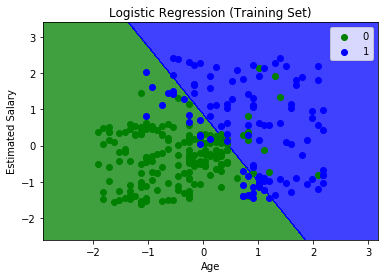

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()- 1, stop = X_set[:,0].max() + 1, step = 0.01),(np.arange(start = X_set[:,1].min()- 1, stop = X_set[:,1].max() + 1, step = 0.01) ))
plt.contourf(X1, X2, classifier_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Visualising the Test Set Results

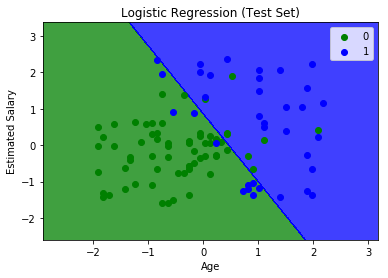

In [40]:
from matplotlib.colors import ListedColormap
X_set = X_test
y_set = y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()- 1, stop = X_set[:,0].max() + 1, step = 0.01),(np.arange(start = X_set[:,1].min()- 1, stop = X_set[:,1].max() + 1, step = 0.01) ))
plt.contourf(X1, X2, classifier_lr.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()